In [1]:
import time
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
teststring = 'GATGGAACTTGACTACGTAAATT'
teststring2 = 'AAAACCCGGT'
teststring3 = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'

## Problem

An **RNA string** is a string formed from the alphabet containing 'A', 'C', 'G', and 'U'.

Given a DNA string t
corresponding to a coding strand, its transcribed RNA string u is formed by replacing all occurrences of 'T' in t with 'U' in u.

**Given:** A DNA string t having length at most 1000 nt.

**Return:** The transcribed RNA string of t.

In [3]:
def DNAtoRNA(string):
    ''' Transform a DNA string to an equivalent RNA string, by tranforming
    all the thymine bases to uracil, irrespective or whether they are
    capital or small letters.
    '''
    
    return string.replace('T','U').replace('t','u')
    
    

In [4]:
print('DNA Test string transformed into RNA:\n', DNAtoRNA(teststring))
print('DNA Test string transformed into RNA (in lower case):\n', DNAtoRNA(teststring.lower()))

DNA Test string transformed into RNA:
 GAUGGAACUUGACUACGUAAAUU
DNA Test string transformed into RNA (in lower case):
 gauggaacuugacuacguaaauu


We can also include some benchmarking time (and see how it scales with the length of the string):

In [5]:
%timeit DNAtoRNA(teststring)

193 ns ± 1.06 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [6]:
def evaluatetime(testfunction, string, nl = 100, nt = 30):
    ''' Function to evaluate time
    '''
    times = np.zeros((nl,2))
    ts = np.zeros(nt)

    for i in range(nl):
        for j in range(nt):
            t0 = time.perf_counter()
            test = testfunction(string*i)
            t1 = time.perf_counter()
            ts[j] = t1-t0

        times[i,:] = ts.mean(), ts.std()
    return times

In [7]:
nl = 100
times_RNA = evaluatetime(DNAtoRNA, teststring, nl)

(0, 7)

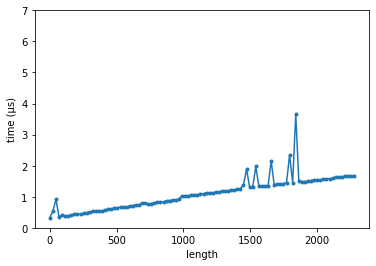

In [8]:

plt.plot(np.arange(nl)*len(teststring),times_RNA[:,0]/1e-6, '.-')

plt.xlabel('length')
plt.ylabel('time (µs)')
plt.ylim(0,15)


## Problem

In DNA strings, symbols 'A' and 'T' are complements of each other, as are 'C' and 'G'.

The **reverse complement** of a DNA string s
is the string sc formed by reversing the symbols of s, then taking the complement of each symbol (e.g., the reverse complement of "GTCA" is "TGAC").

**Given:** A DNA string s of length at most 1000 bp.

**Return:** The reverse complement sc of s.

In [9]:
def elementarycomplement(string, base, comp_base, swap='x'): 
    ''' Elementary swap of bases
    '''
    return string.replace(base,swap).replace(comp_base,base).replace(swap, comp_base)

def DNAreversecomplement(string):
    '''Transform a DNA string to its reverse complement.
    '''
    complement = string[::-1]
    complement = elementarycomplement(complement,'A','T')
    complement = elementarycomplement(complement,'G','C')
    return complement

In [10]:
print('The reverse complement of {} is {}'.format(teststring2,
                               DNAreversecomplement(teststring2)))
print('The reverse complement of {} is {}'.format(teststring,
                               DNAreversecomplement(teststring)))

The reverse complement of AAAACCCGGT is ACCGGGTTTT
The reverse complement of GATGGAACTTGACTACGTAAATT is AATTTACGTAGTCAAGTTCCATC


In [11]:
times_RC = evaluatetime(DNAreversecomplement, teststring, nl)

(0, 25)

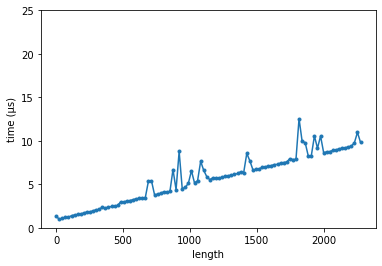

In [12]:
plt.plot(np.arange(nl)*len(teststring),times_RC[:,0]/1e-6, '.-')

plt.xlabel('length')
plt.ylabel('time (µs)')
plt.ylim(0,15)


## Problem

A string is simply an ordered collection of symbols selected from some alphabet and formed into a word; the length of a string is the number of symbols that it contains.

An example of a length 21 DNA string (whose alphabet contains the symbols 'A', 'C', 'G', and 'T') is "ATGCTTCAGAAAGGTCTTACG."

**Given:** A DNA string s of length at most 1000 nt.

**Return:** Four integers (separated by spaces) counting the respective number of times that the symbols 'A', 'C', 'G', and 'T' occur in s
.

In [13]:
def countbases(string, bases = ['A', 'C', 'G', 'T']):
    '''Count number of times each base appears.
    '''
    counts = [string.count(base) for base in bases]
    return counts

In [14]:
print('Counts of the string \n{}\nare: {}'.format(teststring3,
                                       countbases(teststring3)))

Counts of the string 
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
are: [20, 12, 17, 21]


In [15]:
print('Counts of the string \n{}\nare: {}'.format(teststring,
                                       countbases(teststring)))
rteststring = DNAreversecomplement(teststring)
print('and of its reverse \n{}\nare: {}'.format(rteststring,
                                       countbases(rteststring)))

Counts of the string 
GATGGAACTTGACTACGTAAATT
are: [8, 3, 5, 7]
and of its reverse 
AATTTACGTAGTCAAGTTCCATC
are: [7, 5, 3, 8]


In [16]:
times_Counts = evaluatetime(countbases, teststring, nl)

(0, 15)

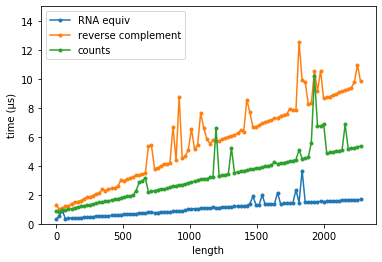

In [18]:
plt.plot(np.arange(nl)*len(teststring),times_RNA[:,0]/1e-6, '.-',
        label = 'RNA equiv')
plt.plot(np.arange(nl)*len(teststring),times_RC[:,0]/1e-6, '.-',
        label = 'reverse complement')
plt.plot(np.arange(nl)*len(teststring),times_Counts[:,0]/1e-6, '.-',
         label = 'counts')
plt.legend()
plt.xlabel('length')
plt.ylabel('time (µs)')
plt.ylim(0,15)


In [37]:
def elementarycomplement(string, base, comp_base, swap='x'): 
    ''' Elementary swap of bases
    '''
    return string.replace(base,swap).replace(comp_base,base).replace(swap, comp_base)

class DNAseq:
    ''' Class to include DNA sequence with methods
    Input:
       - DNA string with sequence
    '''
    def __init__(self, seq):
        self.seq = seq.upper() # We force them to capital letters
        self.length = len(seq)
        
    def toRNA(self):
        ''' Transform a DNA string to an equivalent RNA string, by tranforming
        all the thymine bases to uracil, irrespective or whether they are
        capital or small letters.
        '''

        return self.seq.replace('T','U').replace('t','u')
    

    def reversecomplement(self):
        '''Transform a DNA string to its reverse complement.
        '''
        complement = self.seq[::-1]
        complement = elementarycomplement(complement,'A','T')
        complement = elementarycomplement(complement,'G','C')
        complement = elementarycomplement(complement,'a','t')
        complement = elementarycomplement(complement,'g','c')
        self.rev_comp = complement
        return complement
    
    def countbases(self, bases = ['A', 'C', 'G', 'T']):
        '''Count number of times each base appears.
        '''
        counts = [self.seq.count(base) for base in bases]
        self.counts = counts
        
        return counts
    
    def __len__(self):
        return self.length
    
    def __str__(self):
        return self.seq
    
    def __add__(self, dna_seq2):
        return DNAseq(self.seq+dna_seq2.seq)
    

In [38]:
dna_test1 = DNAseq(teststring)
dna_test2 = DNAseq(teststring2)


In [39]:
print(dna_test1, len(dna_test1))

GATGGAACTTGACTACGTAAATT 23


In [40]:
print(dna_test1+dna_test2, len(dna_test1+dna_test2))

GATGGAACTTGACTACGTAAATTAAAACCCGGT 33


In [43]:
print('Other properties of {}:\n - RNA:{}\n - Reverse comp:{}\n - counts:{}'.format(
            dna_test1,
            dna_test1.toRNA(), 
            dna_test1.reversecomplement(),
            dna_test1.countbases()))

Other properties of GATGGAACTTGACTACGTAAATT:
 - RNA:GAUGGAACUUGACUACGUAAAUU
 - Reverse comp:AATTTACGTAGTCAAGTTCCATC
 - counts:[8, 3, 5, 7]
